<a href="https://colab.research.google.com/github/Venkatsai20032/BHARATINTERN-DATASCIENCE/blob/main/BHARAT_INTERN_DATASCIENCE1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/30
3/3 [==============================] - 2s 9ms/step - loss: 0.2654
Epoch 2/30
3/3 [==============================] - 0s 8ms/step - loss: 0.2079
Epoch 3/30
3/3 [==============================] - 0s 7ms/step - loss: 0.1592
Epoch 4/30
3/3 [==============================] - 0s 10ms/step - loss: 0.1233
Epoch 5/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0965
Epoch 6/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0801
Epoch 7/30
3/3 [==============================] - 0s 8ms/step - loss: 0.0751
Epoch 8/30
3/3 [==============================] - 0s 7ms/step - loss: 0.0794
Epoch 9/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0841
Epoch 10/30
3/3 [==============================] - 0s 6ms/step - loss: 0.0845
Epoch 11/30
3/3 [==============================] - 0s 7ms/step - loss: 0.0810
Epoch 12/30
3/3 [==============================] - 0s 7ms/step - loss: 0.0779
Epoch 13/30
3/3 [==============================] - 0s 7ms/step - loss: 0

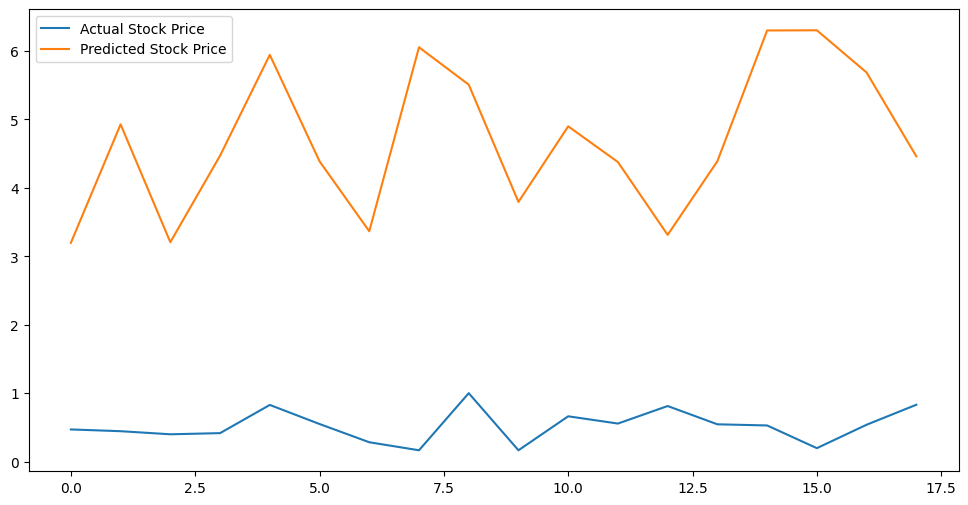

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
np.random.seed(0)
num_points = 100
data = np.random.rand(num_points) * 10 + np.sin(np.linspace(0, 10, num_points))
scaler = MinMaxScaler()
data = data.reshape(-1, 1)
data = scaler.fit_transform(data)
X, y = [], []
look_back = 10
for i in range(len(data) - look_back):
    X.append(data[i:i+look_back])
    y.append(data[i+look_back])
X, y = np.array(X), np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(LSTM(30, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=30, batch_size=32)
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Stock Price')
plt.plot(predicted_stock_price, label='Predicted Stock Price')
plt.legend()
plt.show()

